In [200]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed\moon_filtered.png


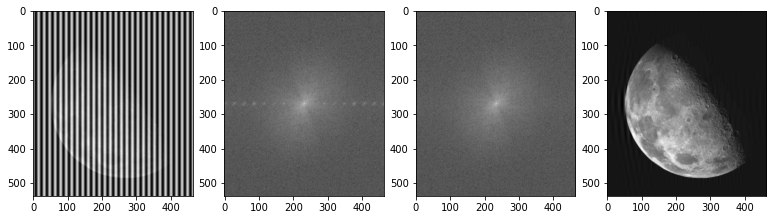

In [201]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256

    kernel = np.array([
        [-2, -4, -2],
        [0, 0, 0],
        [2, 4, 2]
    ])

    kernel = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    kernel = np.array([
        [0, 1, 0],
        [1, 4, 1],
        [0, 1, 0]
    ])


    fft_image = np.fft.fft2(im)
    # fft_image[265:274] = 0
    # fft_kernel = np.fft.fft2(kernel, im.shape)
    # fft_theorem = fft_image * fft_kernel
    # fft_inv = np.fft.ifft2(fft_theorem).real
    # test = np.fft.fft2(utils.uint8_to_float(fft_inv))

    noise = np.fft.fftshift(fft_image)

    #Create the gap in the y axis that holds the noise dots
    y_gap = 6

    #Calculate where the noise is in the y axis
    middle_y_1 = im.shape[0]//2 - y_gap
    middle_y_2 = im.shape[0]//2 + y_gap

    #find the middle of the x axis
    middle_x = im.shape[1]//2

    
    #the gap size of the gap in the middle of the image with no noise
    gap = 25

    #Fill the noise dots with clean values 
    # from right above the noise from the left of the gap
    noise[middle_y_1:middle_y_2, 0:middle_x - gap] = noise[middle_y_1-y_gap*2:middle_y_1, 0:middle_x-gap]
    #Fill the noise dots with clean values 
    # from right above the noise from the right of the gap
    noise[middle_y_1:middle_y_2, middle_x + gap:] = noise[middle_y_1-y_gap*2:middle_y_1, middle_x + gap:]

    #Reverse shift and transform
    fft_theorem  = np.fft.ifft2(np.fft.ifftshift(noise))
    fft_inv = fft_theorem.real

    # print(fft_image[269])

    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))
    plt.subplot(1, 6, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 6, 2) 
    #
    plt.imshow(np.log(np.fft.fftshift(np.abs(fft_image))), cmap="gray")

    plt.subplot(1, 6, 3)
    # Visualize FFT kernel
    plt.imshow(np.log(np.abs(noise)), cmap="gray")

    plt.subplot(1, 6, 4)
    # Visualize filtered FFT image
    plt.imshow((fft_inv), cmap="gray")

    # plt.imshow(np.log(np.fft.fftshift(np.abs(noise))), cmap="gray")


    # Visualize filtered spatial image

    # plt.subplot(1, 6, 6)
    # Visualize FFT kernel
    # plt.imshow(np.fft.fftshift(np.abs(test)), cmap="gray")

    im_filtered = im
    
    

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))